<a href="https://colab.research.google.com/github/IsraelBeltran/DeepLearningMC/blob/master/PracticaFinalTotal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica final de la materia Frameworks**

In [2]:
%%html
<marquee style='width: 80%; color: blue;'><b>Equipo 2</b></marquee>

**Integrantes:**

Julio César Navarro Orquiz, Danny Bravo, Andrés Felipe Cosme Hurtado, José Luis Aroza Unsion e Israel Beltrán Zamarrón

**Objetivo: **

El objetivo de la presente actividad es la de resolver un caso de uso real aplicando de manera conjunta
algunas de las tecnologías presentadas en la asignatura. Con ello el alumno tendrá ocasión de demostrar
los conocimientos adquiridos de manera práctica reproduciendo los ejemplos desarrollados durante las
últimas sesiones en un escenario distinto.
El caso consistirá en entrenar un modelo de clasificación binaria para etiquetar las reviews que escriben
los usuarios de una plataforma de e-commerce en positivas o negativas en función del sentimiento
expresado por el comprador.


En este particular caso se ha elegido el archivo de reviews de Amazon reviews_Musical_Instruments_5.json de los disponibles en: https://jmcauley.ucsd.edu/data/amazon/ 

Descargando el archivo de reviews:

In [119]:
if os.path.isfile("/content/reviews_Musical_Instruments_5.json"):
    print('El archivo de reviews si existe, no se cargará.');
else:
    print('El archivo de reviews no existe y se cargará.');
    !wget https://www.dropbox.com/s/mml3uix68fuzxac/reviews_Musical_Instruments_5.json

--2020-12-03 10:33:47--  https://www.dropbox.com/s/mml3uix68fuzxac/reviews_Musical_Instruments_5.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mml3uix68fuzxac/reviews_Musical_Instruments_5.json [following]
--2020-12-03 10:33:47--  https://www.dropbox.com/s/raw/mml3uix68fuzxac/reviews_Musical_Instruments_5.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f022fdbcf554b7a5898a4f907.dl.dropboxusercontent.com/cd/0/inline/BEXY8FUWMqioIRMrpRoHEFBChdE9clUbs1YtvTFFSzNghd2Af9wfo-ustuNuRM-0fxCHpGvWAhWiQ7DVbPSxCNqQpAPJEkxvSrGH3T-4WT-UAZT01ltedwY-T97fnTa1twQ/file# [following]
--2020-12-03 10:33:48--  https://uc1f022fdbcf554b7a5898a4f907.dl.dropboxusercontent.com/cd/0/inline/BEXY8FUWMqioIRMrpRoHEFBChdE9clUbs1YtvTFFSzNgh

Para abrir el archivo json, se hará uso de la librería pandas

In [4]:
# Librerias necesarias para acceder a archivo de reviews de Amazon
import pandas as pd
import numpy as np

Cargando el archivo:

In [5]:
path_to_file = "/content/reviews_Musical_Instruments_5.json"

In [6]:
df = pd.read_json(path_to_file, lines = True)


Mostrando la información contenida

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [8]:
df.head() # Los primeros 5 reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Mostrando la clasificación de los reviews

In [9]:
df[{"overall","reviewText",}][:10]

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5
5,So good that I bought another one. Love the h...,5
6,"I have used monster cables for years, and with...",5
7,I now use this cable to run from the output of...,3
8,Perfect for my Epiphone Sheraton II. Monster ...,5
9,Monster makes the best cables and a lifetime w...,5


Dejando solo las columnas de interés (recortando columnas)

In [10]:
df= pd.DataFrame(df[{"overall","reviewText"}])

Muestra las clasificaciones que existen

In [11]:
set(df["overall"])

{1, 2, 3, 4, 5}

Eliminando la clasificación con número 3

In [12]:
df.drop(df[df["overall"]==3].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
def etiqueta_sentimiento(row):
    if int(row["overall"]) in (1,2):
      return "negativo"
    elif int(row["overall"]) in (4,5):
      return "positivo"

Crea una nueva etiqueta para clasificar los sentimientos a partir de las clasificaciones: 1,2 = negativo y 4,5 = positivo (3 has sido eliminado)

In [14]:
df["etiqueta_sentimiento"] = df.apply(lambda row: etiqueta_sentimiento(row), axis=1)

Mostrando los últimos 20 valores con la nueva etiqueta (tres etiquetas en total)

In [15]:
df[:20]

,reviewText,overall,etiqueta_sentimiento
0,"Not much to write about here, but it does exac...",5,positivo
1,The product does exactly as it should and is q...,5,positivo
2,The primary job of this device is to block the...,5,positivo
3,Nice windscreen protects my MXL mic and preven...,5,positivo
4,This pop filter is great. It looks and perform...,5,positivo
5,So good that I bought another one. Love the h...,5,positivo
6,"I have used monster cables for years, and with...",5,positivo
7,Perfect for my Epiphone Sheraton II. Monster ...,5,positivo
8,Monster makes the best cables and a lifetime w...,5,positivo
9,"Monster makes a wide array of cables, includin...",5,positivo


Mostrando los reviews totales en este archivo

In [16]:
print("Reviews en total: ", len(df))


Reviews en total:  9489


Ahora se pueden mostrar las reviews en base a su sentimiento (positivo o negativo)

In [17]:
print("Reviews positivas: ", len(df[df["etiqueta_sentimiento"]=="positivo"]))
print("Reviews negativas: ", len(df[df["etiqueta_sentimiento"]=="negativo"]))

Reviews positivas:  9022
Reviews negativas:  467


# **Procesando el texto**

Apoyándose en NLTK para tokenizar

In [18]:
!pip  install nltk

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
import string # necesaria para operaciones con cadenas de carácteres

In [21]:
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))
except:
    import nltk
    nltk.download("stopwords")
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Quitando signos de puntuación:

In [22]:
table = str.maketrans("","", string.punctuation)
df["review_normalizado"] = [" ".join([word.translate(table) for word in row.split()]) for row in df["reviewText"]]
print("Texto de prueba:\n", df["reviewText"][200], "\n")
print("Texto normalizado:\n", df["review_normalizado"][200],"\n")

Texto de prueba:
 Great all around mic used for vocals.  No frills, tough as nails, and great sound for live music.  If you're buying your first mic (or switching from a cheapie) and intend to use it for singing/vocals, this is a mic that any musician would probably recommend without hesitation.  I've never used another one since the first time I switched from a cheaper mic (that came with some bundle) 10 years ago.  I depend on the smoothness of my vocals to carry off songs and this mic reproduces the warm sounds I like perfectly.  You can stand 3 feet away and really wail, or get up close for some bass response, or anything in between.The SM58-CN comes with the mic, 25-ft cable, cable tie, carry pouch, and mic clip.  The standard SM58 does not have a switch (one less thing to break and I don't miss it)  but the SM58-S does have it for a few dollars extra. 

Texto normalizado:
 Great all around mic used for vocals No frills tough as nails and great sound for live music If youre buying

In [23]:
cuerpo_texto_original = df["reviewText"]  # Para uso posterior en evaluación del modelo

Eliminando stopwords

In [24]:
df["review_normalizado"] = [" ".join([word for word in row.split() if not word in stop_words]) for row in df["review_normalizado"]]
print("Texto de prueba:\n", df["reviewText"][200], "\n")
print("Texto normalizado:\n", df["review_normalizado"][200],"\n")

Texto de prueba:
 Great all around mic used for vocals.  No frills, tough as nails, and great sound for live music.  If you're buying your first mic (or switching from a cheapie) and intend to use it for singing/vocals, this is a mic that any musician would probably recommend without hesitation.  I've never used another one since the first time I switched from a cheaper mic (that came with some bundle) 10 years ago.  I depend on the smoothness of my vocals to carry off songs and this mic reproduces the warm sounds I like perfectly.  You can stand 3 feet away and really wail, or get up close for some bass response, or anything in between.The SM58-CN comes with the mic, 25-ft cable, cable tie, carry pouch, and mic clip.  The standard SM58 does not have a switch (one less thing to break and I don't miss it)  but the SM58-S does have it for a few dollars extra. 

Texto normalizado:
 Great around mic used vocals No frills tough nails great sound live music If youre buying first mic switchin

Convirtiendo a minúsculas:

In [25]:
df["review_normalizado"] = [row.lower() for row in df["review_normalizado"]]

In [26]:
cuerpo_texto_normalizado = df["review_normalizado"] # Para uso posterior en la sección de n-grams (más adelante)

In [27]:
# print("Corpus", cuerpo_texto)  # Solo para probar

In [28]:
print("Texto de prueba:\n", df["reviewText"][200], "\n")
print("Texto normalizado:\n", df["review_normalizado"][200],"\n")

Texto de prueba:
 Great all around mic used for vocals.  No frills, tough as nails, and great sound for live music.  If you're buying your first mic (or switching from a cheapie) and intend to use it for singing/vocals, this is a mic that any musician would probably recommend without hesitation.  I've never used another one since the first time I switched from a cheaper mic (that came with some bundle) 10 years ago.  I depend on the smoothness of my vocals to carry off songs and this mic reproduces the warm sounds I like perfectly.  You can stand 3 feet away and really wail, or get up close for some bass response, or anything in between.The SM58-CN comes with the mic, 25-ft cable, cable tie, carry pouch, and mic clip.  The standard SM58 does not have a switch (one less thing to break and I don't miss it)  but the SM58-S does have it for a few dollars extra. 

Texto normalizado:
 great around mic used vocals no frills tough nails great sound live music if youre buying first mic switchin

Usando spaCy para lematización

In [29]:
import os
import spacy

In [30]:
basedir = os.path.dirname(spacy.__path__[0])
if not os.path.isdir(os.path.join(basedir,"en_core_web_sm")):
    from spacy.cli import download
    download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

In [31]:
lemmatization = []
for row in df["review_normalizado"]:
  lemmatization.append(" ".join([token.lemma_ for token in nlp(row)]))
df["review_normalizado"] = lemmatization
# df["review_normalizado"] = [" ".join([token.lemma_ for token in nlp(row)]) for row in df["review_normalizado"]]
print("Texto de prueba:\n", df["reviewText"][200], "\n")
print("Texto normalizado:\n", df["review_normalizado"][200],"\n")


Texto de prueba:
 Great all around mic used for vocals.  No frills, tough as nails, and great sound for live music.  If you're buying your first mic (or switching from a cheapie) and intend to use it for singing/vocals, this is a mic that any musician would probably recommend without hesitation.  I've never used another one since the first time I switched from a cheaper mic (that came with some bundle) 10 years ago.  I depend on the smoothness of my vocals to carry off songs and this mic reproduces the warm sounds I like perfectly.  You can stand 3 feet away and really wail, or get up close for some bass response, or anything in between.The SM58-CN comes with the mic, 25-ft cable, cable tie, carry pouch, and mic clip.  The standard SM58 does not have a switch (one less thing to break and I don't miss it)  but the SM58-S does have it for a few dollars extra. 

Texto normalizado:
 great around mic use vocal no frill tough nail great sound live music if -PRON- be buy first mic switching c

In [32]:
cuerpo_texto_lematizado = df["review_normalizado"] # Para uso posterior en la evaluación de métricas

Palabras usadas

In [33]:
df["cantidad_palabras"] = [len(row.split()) for row in df["review_normalizado"]]

In [34]:
df["cantidad_palabras"][:10]

0     24
1     57
2     47
3     21
4     20
5     31
6     20
7     20
8     29
9    110
Name: cantidad_palabras, dtype: int64

In [35]:
print("Cantidad de palabras en review que han sido normalizadas: ", sum(df["cantidad_palabras"]))

Cantidad de palabras en review que han sido normalizadas:  493226


In [36]:
np.concatenate([row.split() for row in df["review_normalizado"]])

array(['not', 'much', 'write', ..., 'recommend', 'product455', 'star'],
      dtype='<U119')

In [37]:
from collections import Counter
Cuenta = Counter(np.concatenate([row.split() for row in df["review_normalizado"]]))

También serían estas palabras vistas como los unigramas, pero se hablará más de ellos en la siguiente sección con otras herramientas también válidas

In [38]:
cuenta_mas_comun = Cuenta.most_common(20)
cuenta_mas_comun

[('i', 23252),
 ('-PRON-', 12146),
 ('not', 6470),
 ('use', 6367),
 ('guitar', 6166),
 ('sound', 4646),
 ('one', 4343),
 ('the', 4169),
 ('get', 4073),
 ('good', 3989),
 ('string', 3937),
 ('great', 3858),
 ('like', 3735),
 ('well', 3632),
 ('do', 3576),
 ('pedal', 3317),
 ('be', 3309),
 ('work', 3179),
 ('would', 2790),
 ('make', 2711)]

Presentando histograma de ocurrencia de palabras

<function matplotlib.pyplot.show>

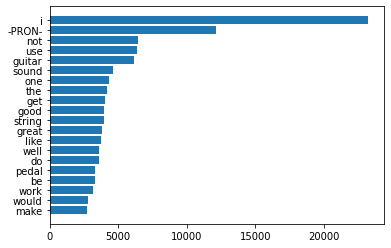

In [39]:
import matplotlib.pyplot as plt
palabras = [w[0] for w in cuenta_mas_comun]
frecuencias = [w[1] for w in cuenta_mas_comun]
frecuencias, palabras = zip(*sorted(zip(frecuencias, palabras)))
plt.barh(palabras, frecuencias)
plt.show

# **Analizando n-grams**

In [40]:
!pip install d2l==0.15.1
!pip install -U mxnet-cu101==1.7.0

     |████████████████████████████████| 61kB 3.1MB/s 
     |███████████████████████████████▌| 834.1MB 1.4MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x3a470000 @  0x7ff14d870615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [42]:
from d2l import mxnet as d2l
from mxnet import np, npx
import random
npx.set_np()

Tokenizando de nueva cuenta con otra herramienta (d21) para extracción de unigramas, bigramas y trigramas.

Presentando unigramas

In [43]:
tokens = d2l.tokenize(cuerpo_texto_normalizado)
print(len(tokens)) # Cantidad de tokens
# Dado que cada línea de texto no es necesariamente una oración o un párrafo,
# concatenar todas las líneas de texto 
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

9489


[('i', 23252),
 ('-PRON-', 12146),
 ('not', 6470),
 ('use', 6367),
 ('guitar', 6166),
 ('sound', 4646),
 ('one', 4343),
 ('the', 4169),
 ('get', 4073),
 ('good', 3989)]

La respectiva gráfica

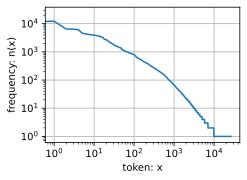

In [44]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

Bigramas

In [45]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('do', 'not'), 3177),
 (('-PRON-', 'be'), 2394),
 (('-PRON-', 'have'), 1859),
 (('i', 'use'), 1408),
 (('i', 'do'), 1025),
 (('i', 'buy'), 984),
 (('can', 'not'), 928),
 (('i', 'would'), 867),
 (('i', 'get'), 732),
 (('i', 'like'), 691)]

Trigramas

In [46]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('i', 'do', 'not'), 996),
 (('-PRON-', 'have', 'use'), 344),
 (('i', 'can', 'not'), 287),
 (('do', 'not', 'know'), 196),
 (('i', 'have', 'not'), 169),
 (('i', 'would', 'recommend'), 156),
 (('-PRON-', 'do', 'not'), 148),
 (('do', 'not', 'want'), 145),
 (('-PRON-', 'have', 'try'), 139),
 (('if', '-PRON-', 'be'), 132)]

Por último, visualicemos la frecuencia simbólica entre estos tres modelos: unigramas, bigramas y trigramas.

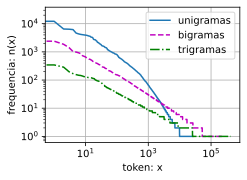

In [47]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequencia: n(x)', xscale='log', yscale='log',
         legend=['unigramas', 'bigramas', 'trigramas'])

# **Elaborando modelo**

Preparando el dataset para modelo de entrenamiento

dataset al momento:

In [48]:
df.head()

,reviewText,overall,etiqueta_sentimiento,review_normalizado,cantidad_palabras
0,"Not much to write about here, but it does exac...",5,positivo,not much write exactly suppose filter pop soun...,24
1,The product does exactly as it should and is q...,5,positivo,the product exactly quite affordablei realize ...,57
2,The primary job of this device is to block the...,5,positivo,the primary job device block breath would othe...,47
3,Nice windscreen protects my MXL mic and preven...,5,positivo,nice windscreen protect mxl mic prevent pop on...,21
4,This pop filter is great. It looks and perform...,5,positivo,this pop filter great -PRON- look perform like...,20


Creando una nueva columna de etiqueta_sentimiento_binario

In [49]:
def etiqueta_sentimiento_bin(row):
    if int(row["overall"]) in (1,2):
      return 0
    elif int(row["overall"]) in (4,5):
      return 1

In [50]:
df["etiqueta_sentimiento_binario"] = df.apply(lambda row: etiqueta_sentimiento_bin(row), axis=1)

In [51]:
df[:30]

,reviewText,overall,etiqueta_sentimiento,review_normalizado,cantidad_palabras,etiqueta_sentimiento_binario
0,"Not much to write about here, but it does exac...",5,positivo,not much write exactly suppose filter pop soun...,24,1
1,The product does exactly as it should and is q...,5,positivo,the product exactly quite affordablei realize ...,57,1
2,The primary job of this device is to block the...,5,positivo,the primary job device block breath would othe...,47,1
3,Nice windscreen protects my MXL mic and preven...,5,positivo,nice windscreen protect mxl mic prevent pop on...,21,1
4,This pop filter is great. It looks and perform...,5,positivo,this pop filter great -PRON- look perform like...,20,1
5,So good that I bought another one. Love the h...,5,positivo,so good i buy another one love heavy cord gold...,31,1
6,"I have used monster cables for years, and with...",5,positivo,i use monster cable year good reason the lifet...,20,1
7,Perfect for my Epiphone Sheraton II. Monster ...,5,positivo,perfect epiphone sheraton ii monster cable wel...,20,1
8,Monster makes the best cables and a lifetime w...,5,positivo,monster make good cable lifetime warranty do n...,29,1
9,"Monster makes a wide array of cables, includin...",5,positivo,monster make wide array cable include high end...,110,1


Mostrando distribución binaria:

(array([ 467.,    0., 9022.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

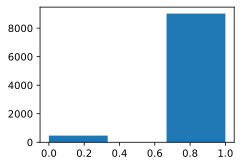

In [52]:
plt.hist(df["etiqueta_sentimiento_binario"], bins=3)

Construyendo un corpus nuevo:

# **Probando modelo**

**NOTA:** En este punto se puede elegir entre probar el modelo con el corpus original, con el corpus normalizado o con el corpus lematizado

In [120]:
# Las opciones a evaluar en el modelo son: cuerpo_texto_original, cuerpo_texto_normalizado y cuerpo_texto_lematizado
#@title Opciones a valorar en el modelo:
dropdown = "Lematizado" #@param ["Original", "Normalizado", "Lematizado"]
if dropdown == "Original":
  cuerpazo = cuerpo_texto_original
  opcion = 1
if dropdown == "Normalizado":
  cuerpazo = cuerpo_texto_normalizado
  opcion = 2
if dropdown == "Lematizado":
  cuerpazo = cuerpo_texto_lematizado
  opcion = 3


In [121]:
from keras.preprocessing.text import Tokenizer

# Codifica cuerpazo -> corpus -> one-hot
# con limit se puede limitar el número de palabras del corpus
def construir_corpus(textos, limit=9489):
    corpus=[]
    i=0
    for t in textos:
        if i>limit:
            break
        for w in t.lower().split(): # ya está todo en mínusculas
            # Si la palabra no está en el corpus y quitando -PRON- (que altera el entrenamiento
            # por tratarse de una palabra que no está dentro de lo originalmente escrito)
            if w[0] not in ('-PRON-') and len(w)>3 and not w in corpus:
                corpus.append(w)
                i=i+1
    
    # Codifica palabras como enteros
    t = Tokenizer()
    t.fit_on_texts(corpus)
    encoded_corpus = t.texts_to_matrix(corpus, mode='count')
    
    return corpus[:limit], encoded_corpus[:limit]

Probando que hemos creado una función para un corpus adecuado (Sin -PRON-):

In [122]:
# Se prueban tres frases para confirmar que todo va bien
prueba = ['Esta es la práctica final', "-PRON-", "Somos el equipo ganador"]

corpusa, encoded_corpusa = construir_corpus(prueba)
print (corpusa)
print (encoded_corpusa)

['esta', 'práctica', 'final', 'somos', 'equipo', 'ganador']
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


Ahora con los reviews (cuerpazo):

In [123]:
# Ahora se emplean los tweets del dataset
corpusa, encoded_corpusa = construir_corpus(cuerpazo)
print (corpusa)
print (encoded_corpusa) # En el ejemplo esto no tendrá uso

['much', 'write', 'exactly', 'suppose', 'filter', 'sound', 'recording', 'crisp', 'price', 'amazon', 'well', 'honestly', 'work', 'despite', 'pricing', 'product', 'quite', 'affordablei', 'realize', 'double', 'screen', 'arrive', 'even', 'better', 'expectedas', 'bonus', 'carry', 'small', 'hint', 'smell', 'grape', 'candy', 'reminiscent', 'sake', 'stop', 'next', 'nose', 'record', 'need', 'expensive', 'come', 'pleasing', 'aroma', 'like', 'mine', 'didbuy', 'primary', 'device', 'block', 'breath', 'would', 'otherwise', 'produce', 'allow', 'voice', 'pass', 'noticeable', 'reduction', 'volume', 'high', 'frequency', 'cloth', 'pops', 'coloration', 'metal', 'clamp', 'mount', 'attaches', 'mike', 'stand', 'secure', 'enough', 'keep', 'attach', 'goose', 'neck', 'little', 'coax', 'stay', 'nice', 'windscreen', 'protect', 'prevent', 'only', 'thing', 'gooseneck', 'marginally', 'able', 'hold', 'position', 'require', 'careful', 'positioning', 'avoid', 'this', 'great', 'look', 'perform', 'studio', 'vocal', 'elim

Codificando hacia un target:

In [124]:
# echo 1 > /proc/sys/vm/overcommit_memory

import numpy as np
from keras.utils import to_categorical

def codifica_reviews(reviews, corpus, corpus_size=len(cuerpazo)):
    coded = np.zeros((len(reviews), corpus_size))
    for i, reviews_text in enumerate(reviews):
        words = reviews_text.lower().split()
        for w in words:
            if w in corpus:
                coded[i,corpus.index(w)] = 1

    return coded

x_train = codifica_reviews(df["reviewText"], corpusa)
y_train = to_categorical(df["etiqueta_sentimiento_binario"])

In [125]:
print(x_train[13])  # En este particular caso, el review es considerado negativo
print(y_train[13])
print(x_train[1])  # En este particular caso, el review es considerado positivo
print(y_train[1])

[1. 0. 0. ... 0. 0. 0.]
[1. 0.]
[0. 0. 1. ... 0. 0. 0.]
[0. 1.]


Agregando cierta sana aleatoriedad:

In [126]:
# Aletoriedad en el dataset
np.random.seed(42)    
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]
     
# Se obtiene el conjunto de validación
num_val = int(len(cuerpazo)/4) # solo el 25 % para validación y test
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

# Se obtiene el conjunto de test
x_test = x_train[:num_val]
x_train = x_train[num_val:]
y_test = y_train[:num_val]
y_train = y_train[num_val:]

verificando la codificación y el ordenamiento aleatorio:

In [127]:
print (x_train[13]) # Ya no tienen el mismo orden que originalmente tenian las codificaciones
print (y_train[13])
print (x_val[0])
print (y_val[0])
print(x_test[13])
print(y_test[13])
print(f"Longitud de entrenamiento: {len(x_train)}, prueba: {len(x_test)} y validación: {len(x_val)}.")



[0. 0. 0. ... 0. 0. 0.]
[0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 1.]
Longitud de entrenamiento: 4745, prueba: 2372 y validación: 2372.


Definiendo el modelo de red neuronal y entrenandolo:

In [128]:
import keras
from keras import models, layers
import tensorflow as tf
import keras.backend as K
print(f"TF version: {tf.__version__}, Keras version: {keras.__version__}\n")


# Diversas métricas
def precision(y_true, y_pred): # Precisión de Keras
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): # Recall de Keras
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def f1_score(y_true, y_pred): # Calculando f1
    precision_m = precision(y_true, y_pred)
    recall_m = recall(y_true, y_pred)
    return (2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon())))

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(cuerpazo),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=["acc",precision,recall,f1_score])

train_log= model.fit(x_train, y_train, epochs=5)

TF version: 2.3.0, Keras version: 2.4.3

Epoch 1/5
149/149 [==============================] - 1s 5ms/step - loss: 0.2636 - acc: 0.9530 - precision: 0.9532 - recall: 0.9532 - f1_score: 0.9532
Epoch 2/5
149/149 [==============================] - 1s 5ms/step - loss: 0.1903 - acc: 0.9532 - precision: 0.9534 - recall: 0.9534 - f1_score: 0.9534
Epoch 3/5
149/149 [==============================] - 1s 5ms/step - loss: 0.1582 - acc: 0.9532 - precision: 0.9529 - recall: 0.9529 - f1_score: 0.9529
Epoch 4/5
149/149 [==============================] - 1s 5ms/step - loss: 0.1390 - acc: 0.9532 - precision: 0.9534 - recall: 0.9534 - f1_score: 0.9534
Epoch 5/5
149/149 [==============================] - 1s 5ms/step - loss: 0.1262 - acc: 0.9545 - precision: 0.9547 - recall: 0.9547 - f1_score: 0.9547


Graficando resultados:

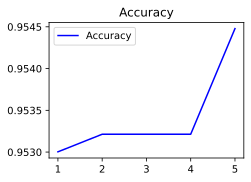

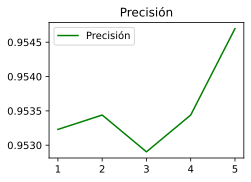

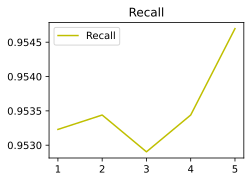

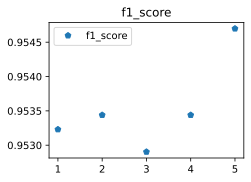

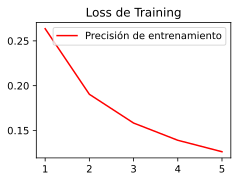

In [129]:
# Visualizando el entrenamiento
import matplotlib.pyplot as plt
import time
acc = train_log.history["acc"]
loss = train_log.history["loss"]
pres = train_log.history["precision"]
rec = train_log.history["recall"]
f1 = train_log.history["f1_score"]
retardo = 5

epochs = range(1, len(acc) + 1)
# Las gráficas de las métricas
plt.plot(epochs, acc, "b", label="Accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, pres, "g", label="Precisión")
plt.title("Precisión")
plt.legend()
plt.figure()
plt.plot(epochs,rec,"y",label="Recall")
plt.title("Recall")
plt.legend()
plt.figure()
plt.plot(epochs,f1,"p",label="f1_score")
plt.title("f1_score")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Precisión de entrenamiento")
plt.title("Loss de Training")
plt.legend()

plt.show()

# **Validando el modelo**

In [130]:
# Validando el modelo "acc",precision,recall,f1_score
loss1,accuracy1,precision1,recall1,f1a = model.evaluate(x_test, y_test)
print(accuracy1)  # Estos valores deben ser compartidos para verse en MLflow
print(loss1)

75/75 [==============================] - 0s 4ms/step - loss: 0.2767 - acc: 0.9439 - precision: 0.9417 - recall: 0.9417 - f1_score: 0.9417
0.9439291954040527
0.2766525447368622


Haciendo predicciones:

In [131]:
# Predicción sobre el conjunto de datos de prueba
predictions = model.predict(x_test)
print (predictions[1]) # La clase más común
print (y_test[1])
print (predictions[137]) # Una de las clases
print (y_test[100])
print(predictions[1])
print(len(predictions))
print(len(y_test))

[0.0018749  0.99812514]
[0. 1.]
[0.00863469 0.9913653 ]
[0. 1.]
[0.0018749  0.99812514]
2372
2372


In [132]:
print(y_test.shape)
print(predictions.shape)

(2372, 2)
(2372, 2)


In [133]:
y_t = [0 for i in range(len(y_test))]
y_p = [0 for i in range(len(y_test))]
for i in range(len(y_test)):
  y_t[i] = np.argmax(y_test[i])
  y_p[i] = np.argmax(predictions[i])
  # print(y_t[i],y_p[i])

Elaborando la matriz de confusión con pandas:

In [134]:
import pandas as pd
y_actu = pd.Series(y_t, name='Actual')
y_pred = pd.Series(y_p, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted   0     1   All
Actual                   
0           1   122   123
1          11  2238  2249
All        12  2360  2372


Presentando la matriz de confusión con matplotlib:

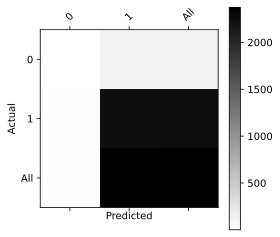

In [135]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

Con valores conocidos:

In [136]:
def vuelve_sentimiento(valor):
    if valor == 0:
      sentimiento = "negativo"
    if valor == 1:
      sentimiento = "positivo"
    return sentimiento

In [137]:
print("El review (codificado): ", x_train[113], "\nes considerado: ", vuelve_sentimiento(np.argmax(predictions[113])),"\ny originalmente es: ", vuelve_sentimiento(np.argmax(y_train[113])))

El review (codificado):  [0. 0. 0. ... 0. 0. 0.] 
es considerado:  positivo 
y originalmente es:  positivo


# **Guardando las métricas en tabla cvs**

Cargando tabla csv donde se guardan los parámetros obtenidos con el modelo para su posterior uso en MLflow (NOTA: Se pasará a una implementación fuera de este notebook)

In [138]:
if os.path.isfile("/content/Tablacsv.csv"):
    print('El archivo de experimentos si existe, no se cargará.');
else:
    print('El archivo con la tabla de experimentos no existe y se cargará.');
    !wget https://www.dropbox.com/s/7hd3dftb1ma5nzs/Tablacsv.csv

El archivo existe, no se cargará.


Cargando librerias para manejo de tabla:

In [139]:
import pandas as pd
from datetime import datetime

Clase de acceso a la tabla:

In [140]:
class BaseDatos:

    def __init__(self):
        self.PATH = "/content/Tablacsv.csv"
        self.df = pd.read_csv(self.PATH, encoding="utf-8")

    def setvalue(self, numero, key, value):
        try:
            self.df.at[(self.df["Numero"] == numero), key] = value
            self.df.to_csv(self.PATH, index=False, header=True)
        except:
            print(f"Error al guardar en el archivo.")

    def getvalue(self, numero, key):
        try:
            return self.df[(self.df["Numero"] == numero)][key].values[0]
        except:
            return None

Guardando parámetros:

In [141]:
# Importando basedatos
bd = BaseDatos()

# loss1,accuracy1,precision1,recall1,f1a
bd.setvalue(opcion, "Nombre", path_to_file )
bd.setvalue(opcion, "Accuracy", accuracy1)
bd.setvalue(opcion, "Loss", loss1)
bd.setvalue(opcion, "Precision", precision1 )
bd.setvalue(opcion, "Recall", recall1)
bd.setvalue(opcion, "f1_score", f1a)
bd.setvalue(opcion, "FechaPrueba", datetime.now())

bd.df.head()

,Numero,Nombre,FechaPrueba,Accuracy,Loss,Precision,Recall,f1_score
0,1,/content/reviews_Musical_Instruments_5.json,2020-12-03 09:54:30.670631,0.946037,0.277801,0.943750,0.943750,0.943750
1,2,/content/reviews_Musical_Instruments_5.json,2020-12-03 09:54:51.817104,0.946037,0.277801,0.943750,0.943750,0.943750
2,3,/content/reviews_Musical_Instruments_5.json,2020-12-03 10:37:18.795852,0.943929,0.276653,0.941667,0.941667,0.941667


Guardando la tabla:

In [142]:
from google.colab import files
files.download("/content/Tablacsv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
!pip install dropbox

In [145]:
import dropbox
 
class TransferData:
    def __init__(self, access_token):
        self.access_token = access_token
 
    def upload_file(self, file_from, file_to):
        dbx = dropbox.Dropbox(self.access_token)
 
        with open(file_from, 'rb') as f:
            dbx.files_upload(f.read(), file_to)
 
def manda_archivo_dropbox():
    access_token = "sl.AmvAdgogX9CsJlOWqoj5MBcfHSWaII_qX5B1kO5c5lDDnvxW5jpq4BGMCAZl_Nf_jPOa-xIGGfPh2Kt3zlAWvORt4_13jX1qwYHXQ4-jjjyJVtibTm1rDpSN4KsKf7A7tjheUNDl"
    transferData = TransferData(access_token)
 
    file_from = "/content/Tablacsv.csv" # Archivo a cargar en dropbox
    file_to = "/Practicafinal/Tablacsv.csv"  # Trayectoria y nombre del archivo a cargar en dropbox
 
    # API v2
    transferData.upload_file(file_from, file_to)
 
manda_archivo_dropbox()

FIN DEL NOTEBOOK EN COLAB

NOTA: La siguiente parte a desarrollar con MLflow se corre fuera del Notebook